## Experiment 1,2 - advertising.csv
## Experiment 3,4,5 - smarket.csv (exp3 is summery)
## Experiment 6,7,8,9,10 - collegedata.csv (exp7 is summery)

# Experiment 1:

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
data = pd.read_csv('advertising.csv')

x = data['TV'].values.reshape(-1, 1)
y = data['Sales'].values
model = LinearRegression().fit(x, y)
tv_coefficient = model.coef_[0]
print("Least squares coefficient for TV:", tv_coefficient)

Least squares coefficient for TV: 0.05546477046955886


# Experiment 2:

In [6]:
import statsmodels.api as sm
x = data['TV'].values.reshape(-1, 1)
y =data['Sales'].values
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
t_stat = model.tvalues[1]  #T - Statistics
rse = model.mse_resid ** 0.5  #Residual Standard Error
f_stat = model.fvalue  #F - Statistic
rss = model.ssr  #Residual Sum of Squares Error
print("T-Statistic:", t_stat)
print("Residual Standard Error:", rse)
print("F-Statistic:", f_stat)
print("Residual Sum of Squares (RSS):", rss)

T-Statistic: 29.260497480686528
Residual Standard Error: 2.2957457136214456
F-Statistic: 856.1767128172628
Residual Sum of Squares (RSS): 1043.5487795590257


# Experiment 3:
### Write about the statistically significant - hypothesis

# Experiment 4:

In [46]:
from sklearn.neighbors import KNeighborsClassifier as K
from sklearn.metrics import*
df = pd.read_csv('smarket.csv')
x = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = df['Direction']
m=K(n_neighbors=3).fit(x,y)
print("Confusion Matrix:",confusion_matrix(y,m.predict(x)))
print("Overall Fraction of Correct Predictions:",accuracy_score(y,m.predict(x)))

Confusion Matrix: [[445 157]
 [147 501]]
Overall Fraction of Correct Predictions: 0.7568


# Experiment 5:

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

data = pd.read_csv('smarket.csv')
data['Direction'] = data['Direction'].map({'Up': 1, 'Down': 0})
X = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = data['Direction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Compute R-squared, Mallow’s Cp, AIC and BIC:
adj_r_squared = 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
mse = np.mean((y_test - y_pred) ** 2)
cp = mse + 2 * X_test.shape[1] * (mse / len(y_test))
aic = len(y_test) * np.log(mse) + 2 * X_test.shape[1]
bic = len(y_test) * np.log(mse) + X_test.shape[1] * np.log(len(y_test))

print("Adjusted R-squared:", adj_r_squared)
print("Mallow's Cp:", cp)
print("AIC:", aic)
print("BIC:", bic)

Adjusted R-squared: -0.3285229007660486
Mallow's Cp: 0.3386204444444445
AIC: -270.43975441623655
BIC: -249.31098890906307


# Experiment 6:

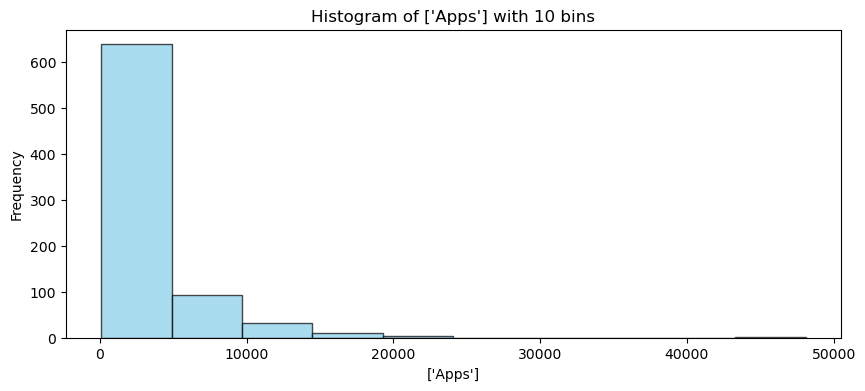

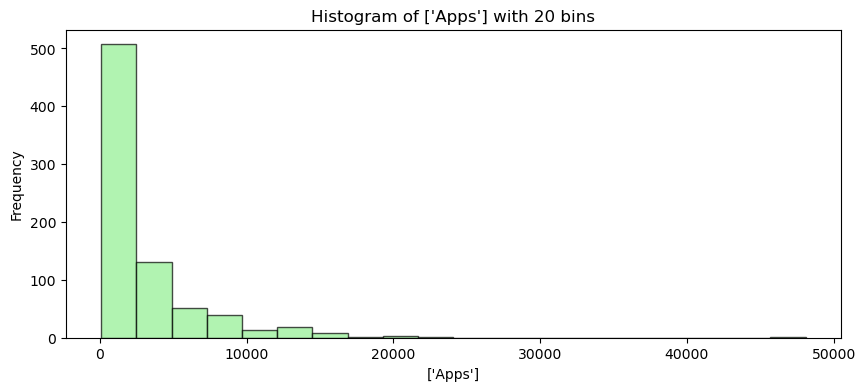

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
college_data = pd.read_csv('collegedata.csv')
var = ['Apps'] # you can add some more variables and using a for loop

plt.figure(figsize=(10, 4))
plt.hist(college_data[var], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Histogram of {var} with 10 bins')
plt.xlabel(var)
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 4))
plt.hist(college_data[var], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title(f'Histogram of {var} with 20 bins')
plt.xlabel(var)
plt.ylabel('Frequency')
plt.show()

# Experiment 7:Write about the histograms that you have observed

# Experiment 8:

In [87]:
from scipy.stats import pearsonr, spearmanr, kendalltau
selected_variables = ['Apps', 'Accept', 'Enroll']
# Calculate Pearson correlation, Spearman correlation, Kendall correlation

pearson_corr = college_data[selected_variables].corr(method='pearson') 
spearman_corr = college_data[selected_variables].corr(method='spearman')
kendall_corr = college_data[selected_variables].corr(method='kendall')

print("Pearson Correlation:\n",pearson_corr)
print("\nSpearman Correlation:\n",spearman_corr)
print("\nKendall Correlation:\n",kendall_corr)

Pearson Correlation:
             Apps    Accept    Enroll
Apps    1.000000  0.943451  0.846822
Accept  0.943451  1.000000  0.911637
Enroll  0.846822  0.911637  1.000000

Spearman Correlation:
             Apps   Accept    Enroll
Apps    1.000000  0.97939  0.926169
Accept  0.979390  1.00000  0.946400
Enroll  0.926169  0.94640  1.000000

Kendall Correlation:
             Apps    Accept    Enroll
Apps    1.000000  0.886006  0.763762
Accept  0.886006  1.000000  0.801569
Enroll  0.763762  0.801569  1.000000


# Experiment 10:

In [85]:
import numpy as np
array = np.array([[1, 2],
 [2, 1]])
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(array)
# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[ 3. -1.]
Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


# Experiment 9:

In [130]:
import pandas as pd
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, chi2_contingency
college_data = pd.read_csv('collegedata.csv')

t_statistic, p_value = ttest_1samp(college_data['Apps'], 1000)
print("Simple Hypothesis T-test statistic: ",t_statistic)

group1 = college_data[college_data['Private'] == 'Yes']['Accept']
group2 = college_data[college_data['Private'] == 'No']['Accept']
t_statistic, p_value = ttest_ind(group1, group2)
print("\nStudent T-test statistic:",t_statistic)

t_statistic, p_value = ttest_rel(college_data['Apps'], college_data['Accept'])
print("\nPaired t-test between Apps and Accept: ",t_statistic)

group1 = college_data[college_data['Private'] == 'Yes']['Accept']
group2 = college_data[college_data['Private'] == 'No']['Accept']
u_statistic, p_value = mannwhitneyu(group1, group2)
print("\nU test statistic:",u_statistic)

correlation = college_data[['Apps', 'Accept', 'Enroll']].corr(method='pearson')
print("\nCorrelation:\n",correlation)

covariance = college_data['Apps'].cov(college_data['Accept'])
print("\nCovariance",covariance)

contingency_table = pd.crosstab(college_data['Apps'], college_data['Accept'])
chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)
print("\nChi-square Test statistic:",chi2_statistic)

Simple Hypothesis T-test statistic:  14.416590015808657

Student T-test statistic: -15.037175252579376

Paired t-test between Apps and Accept:  15.593495811336158

U test statistic: 21811.0

Correlation:
             Apps    Accept    Enroll
Apps    1.000000  0.943451  0.846822
Accept  0.943451  1.000000  0.911637
Enroll  0.846822  0.911637  1.000000

Covariance 8949859.811893819

Chi-square Test statistic: 494905.8333333331
